# CS 205 Final Exam
## You may use your books (both R and Python) and the Internet. You can NOT use help directly from another person! You may send me e-mail to ask questions or contact me during office hours (9-11 am Tuesday and Wednesday).

# _This is a reminder of your obligation to the Honor Code_

**Enter your name here: Andrew Poock**

In the 1980s, the [National Cancer Institute](http://cancer.gov) developed a set of 60 cancer cell lines, called [NCI60](http://www.broadinstitute.org/mpr/NCI60/NCI60.html). The original purpose was for screening potential anti-cancer drugs. Here you will examine gene expresion in these cell lines. More than 41,000 probes were used for each of the 60 cell lines. For convenience, the data are provided in `NCI60.csv` and `NCI60cells.csv`.<p/>
`NCI60` is somewhat large -- 41,078 probes by 60 cell lines. Each of these 2,454,680 entries is a measure of how much a particular gene was expressed in one cell line.<p/>
One clue that a gene is linked to cancer is differences in expression of that gene from one cancer type to another. Here's the wrangling involved in extracting the expression of TOP3A for each cell line.


In [346]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotnine import *

_Insert a line of code to read NCI60.csv into a dataframe named_ `Narrow`.

In [347]:
Narrow = pd.read_csv("NCI60.csv")

_Insert a line of code to visually inspect or verify the structure and data of_ `Narrow`

In [348]:
Narrow.head()

,i,Probe,BR.MCF7,BR.MDA_MB_231,BR.HS578T,BR.BT_549,BR.T47D,CNS.SF_268,CNS.SF_295,CNS.SF_539,...,PR.PC_3,PR.DU_145,RE.786_0,RE.A498,RE.ACHN,RE.CAKI_1,RE.RXF_393,RE.SN12C,RE.TK_10,RE.UO_31
0,1,AT_D_3,-7.45,-7.51,-7.30,-7.37,-6.15,-7.16,-7.03,-7.44,...,-6.88,-6.78,-7.25,-7.17,-6.51,-6.66,-6.53,-6.86,-7.03,-6.85
1,2,AT_D_5,-7.05,-6.62,-6.88,-6.78,-7.18,-7.25,-7.22,-7.37,...,-6.27,-7.04,-6.68,-6.83,-6.65,-6.61,-6.23,-6.74,-6.85,-6.67
2,3,AT_D_M,-7.05,-7.29,-7.30,-7.37,-7.61,-6.56,-7.63,-7.44,...,-6.45,-7.29,-7.25,-7.14,-6.53,-6.93,-6.17,-7.20,-6.93,-6.85
3,4,AT_L_3,-7.32,-7.01,-7.22,-6.60,-7.45,-7.00,-7.32,-7.27,...,-6.30,-7.01,-6.73,-6.50,-6.37,-6.54,-7.07,-6.86,-6.55,-6.67
4,5,AT_L_5,-7.38,-7.22,-7.30,-7.37,-7.70,-7.25,-7.61,-7.44,...,-6.48,-7.15,-7.06,-6.44,-6.47,-6.62,-7.00,-7.22,-6.89,-6.36


_Insert a line of code that will transform_ `Narrow` _from wide to narrow format. Use_ `Probe` _as the identifier variable._

In [349]:
Narrow = pd.melt(Narrow, id_vars='Probe', var_name='cellLine', value_name='expression')

_Insert a line of code to verify the structure and data of_ `Narrow`

In [350]:
Narrow.head()

,Probe,cellLine,expression
0,AT_D_3,i,1.0
1,AT_D_5,i,2.0
2,AT_D_M,i,3.0
3,AT_L_3,i,4.0
4,AT_L_5,i,5.0


_Insert a line of code to read_ `NCI60cells.csv` _into the variable_ `CellTypes`. We're only interested in the `cellLine` and `tissue` columns. Both of these operations could happen in one line, or two.

In [351]:
CellTypes = pd.read_csv("NCI60cells.csv")
CellTypes = CellTypes[['cellLine', 'tissue']]

_Insert a line of code to verify the structure and data of_ `CellTypes`

In [352]:
CellTypes.head()

,cellLine,tissue
0,BR:MCF7,Breast
1,BR:MDA_MB_231,Breast
2,BR:HS578T,Breast
3,BR:BT_549,Breast
4,BR:T47D,Breast


_Notice how the cellLine names in this file use_ `:` _rather than_ `.` _We need to fix this. Update the contents of_ `cellLine` _to replace_ `:` _with_ `.` _using_ `str.replace`. _You will likely need to escape the_ `:`. 

In [353]:
CellTypes['cellLine'] = CellTypes['cellLine'].str.replace(':', '.')

_Insert a line of code to verify the structure and data of_ `CellTypes`

In [354]:
CellTypes.head()

,cellLine,tissue
0,BR.MCF7,Breast
1,BR.MDA_MB_231,Breast
2,BR.HS578T,Breast
3,BR.BT_549,Breast
4,BR.T47D,Breast


_Write a line of code to join the data in_ `Narrow` _and_ `CellTypes`_, storing the result back into_ `Narrow`. _You should be able to mostly match the figure below. It's OK if your column names are different, as long as you are consistent!_

In [355]:
Narrow = pd.merge(Narrow, CellTypes, on='cellLine')

_Write a line of code to verify the structure and data in_ `Narrow`.

In [356]:
Narrow.head()

,Probe,cellLine,expression,tissue
0,AT_D_3,BR.MCF7,-7.45,Breast
1,AT_D_5,BR.MCF7,-7.05,Breast
2,AT_D_M,BR.MCF7,-7.05,Breast
3,AT_L_3,BR.MCF7,-7.32,Breast
4,AT_L_5,BR.MCF7,-7.38,Breast


![Table 1](Final/T1.png "Table 1")

_Insert a line of code to extract those rows from_ `Narrow` _corresponding to the Probe_ `TOP3A`_, storing the result into a variable named_ `Probe_TOP3A`

In [357]:
Probe_TOP3A = Narrow[Narrow['Probe'] == 'TOP3A']

_Write a line of code to verify the structure and data of_ `Probe_TOP3A`.

In [358]:
Probe_TOP3A.head()

,Probe,cellLine,expression,tissue
4688,TOP3A,BR.MCF7,-0.37,Breast
45766,TOP3A,BR.MDA_MB_231,-0.18,Breast
86844,TOP3A,BR.HS578T,0.32,Breast
127922,TOP3A,BR.BT_549,0.05,Breast
169000,TOP3A,BR.T47D,-0.31,Breast


_If you have made it this far, your data in_ `Probe_TOP3A` _should resemble Table 2. It's OK to have more columns or for the columns to have different names._
![Table 2](Final/T2.png "Table 2")

_Create a new dataframe named_ `SummaryStats` _that contains the mean, standard deviation and count of the expression data **in each cancer tissue type**._

In [359]:
SummaryStats = Probe_TOP3A.groupby('tissue')['expression'].agg(['mean', 'std', 'count'])

_We need to convert the mean expression data using numpy's_ `exp` _function. Be sure that the standard deviation and count values are **not** converted!_ <p/>

_Create a new column named_ `se` _that represents the standard error. The standard error is calculated as_
\begin{equation*}
\frac{standard\ deviation}{\sqrt {count}}
\end{equation*}
_for each group. This value will be used to calculate the error bars later._

In [360]:
SummaryStats['se'] = SummaryStats['std']/(np.sqrt(SummaryStats['count']))
SummaryStats['mean_exp'] = np.exp(SummaryStats['mean'])
SummaryStats = SummaryStats.drop(columns=['std', 'count', 'mean'])

_Insert a line of code to verify the structure and data in_ `SummaryStats`. _It should resemble the table below (ours will be slightly different in that we're including standard deviation values). You will also see that_ `tissue` _became an index during our aggregation. Remove it as an index so that we have_ `tissue` _available to graph._

In [361]:
SummaryStats.reset_index(inplace=True)
SummaryStats.head()

,tissue,se,mean_exp
0,Breast,0.126941,0.906649
1,CNS,0.117974,0.525538
2,Colon,0.153587,0.354466
3,Leukemia,0.254999,0.659241
4,Melanoma,0.098388,0.572925


![Table 3](Final/T3.png "Table 3")

The figure below shows the mean expression data graphically. This sort of bar graph is often seen in the scientific literature, but that does not mean it is an effective presentation.
![Figure 1](Final/F1.png "Figure 1")
_Insert code to generate a similar bar graph of mean gene expression from the_ `SummaryStats` _data frame._

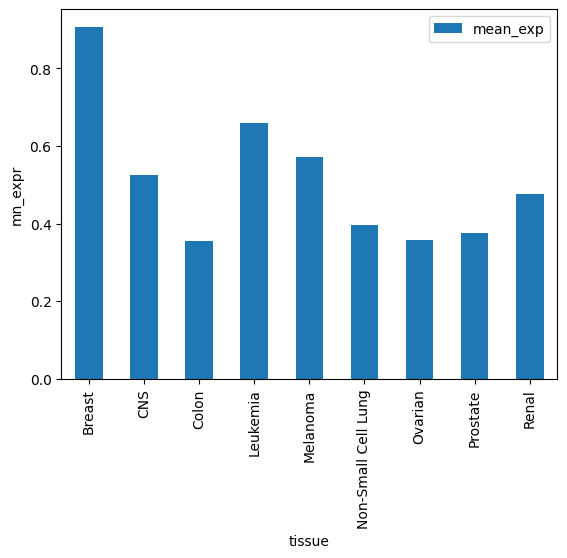

In [362]:
SummaryStats.plot(kind='bar', x='tissue', y='mean_exp')
plt.xlabel('tissue')
plt.ylabel('mn_expr')
plt.show()

To judge from the figure, `TOP3A` is expressed more highly in breast cancer than in other cancer tissue types. <p/>
But don't jump to conclusions! Expression differs even from one cell line to another of the same tissue type, as in the next figure.
![Figure 2](Final/F2.png "Figure 2")
_Insert code below to do two things._
* _We want to plot the_ `Probe_TOP3A` _mean expression data by tissue type. To do this, you'll need to convert the gene expression data in_ `Probe_TOP3A` _with_ `np.exp`.
* _Plot your data like the example figure._

C:\Users\andre\AppData\Local\Temp\ipykernel_5892\3069104702.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


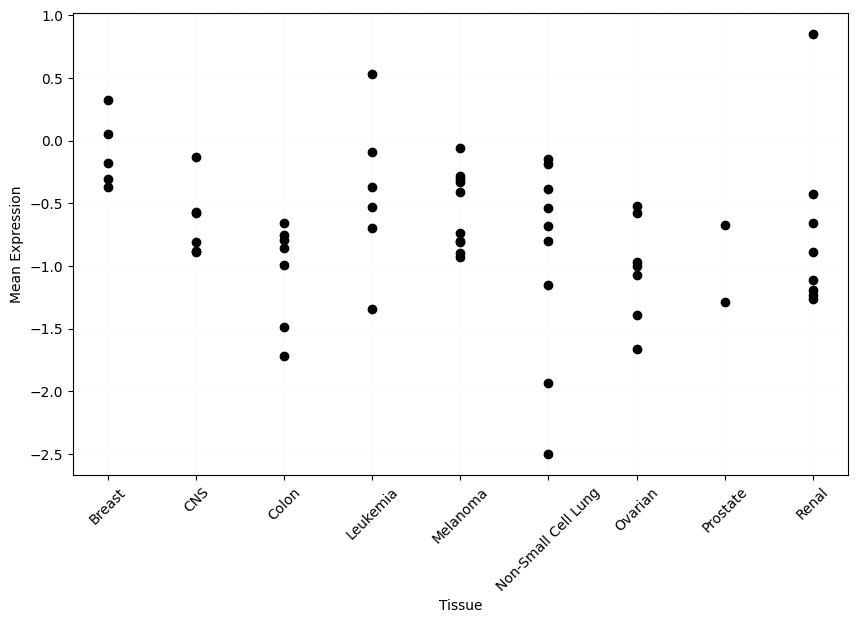

In [363]:
Probe_TOP3A['mean_exp'] = np.exp(Probe_TOP3A['expression'])
plt.figure(figsize=(10,6))
plt.scatter(Probe_TOP3A['tissue'], Probe_TOP3A['expression'], marker='o', color='black')
plt.xlabel('Tissue')
plt.ylabel('Mean Expression')
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=.05)
plt.show()

C:\Users\andre\AppData\Local\Temp\ipykernel_5892\3939482373.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


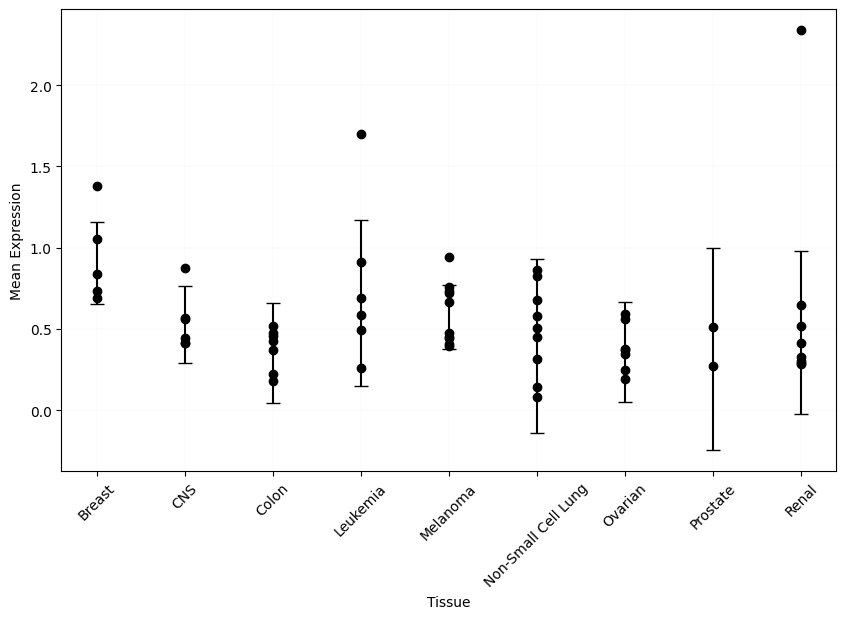

In [364]:
Probe_TOP3A['mean_exp'] = np.exp(Probe_TOP3A['expression'])
plt.figure(figsize=(10,6))
plt.scatter(Probe_TOP3A['tissue'], Probe_TOP3A['mean_exp'], marker='o', color='black')
plt.errorbar(SummaryStats['tissue'], SummaryStats['mean_exp'], yerr=SummaryStats['se']*2, capsize=5, ls='none', color='black')
plt.xlabel('Tissue')
plt.ylabel('Mean Expression')
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=.05)
plt.show()

When looking at the individual cell lines, it's not so clear that `TOP3A` is expressed differently in breast cancer compared to the others.<p/>
The mean reflects the `Top3A` expression collectively within each tissue type. As such, the mean is a **statistic** (a calculated quantity giving a collective property for a set of cases). In order to compare different tissues to one another, some indication must be given for the precision of the mean. Clasically, this indication is provided by a **confidence interval** at the 95-percent level.<p/>
Write code to produce error bars on the plotted data. The tops and bottoms of the error bars should be two standard errors above and below the mean for each tissue. Your graph should look something like below. You will need to combine the data for `Top3A` with standard errors for the various tissues, somehow.<p/>
The 'secret sauce' to make this work in `matplotlib`'s `plt.errorbar`, which takes a number of parameters, including the `x` and `y` values (use the `mean` here), how far to extend the error bar (`standard error` * 2), and include `capsize=5, ls='none'` to put the horizontal lines on the ends of the error bars and to _not_ connect the data with a best-fit line.<p/>
Similarly, when using `plotnine`, calculate and use the `ymin` and `ymax` values for `geom_errorbar`.
![Figure 5](Final/F5.png "Figure 5")

There are 32,344 distinct probes in `NCI60`. `TOP3A` in the above example was selected literally at random. Repeat the above analysis with a different probe (I'd recommend A_23_P61317, A_24_P190631, or A_23_P135646 -- sadly, this term we've run out of time to discover why!). Your goal is to create a graph for this probe like we just did with the error bars.

C:\Users\andre\AppData\Local\Temp\ipykernel_5892\1976602611.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


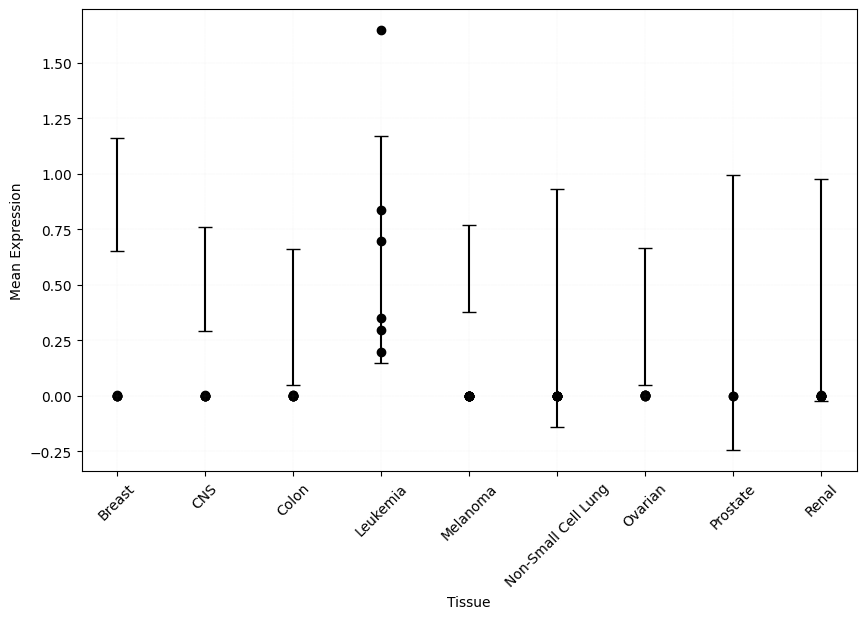

In [365]:
Probe_A23 = Narrow[Narrow['Probe'] == 'A_23_P135646']
Probe_A23['mean_exp'] = np.exp(Probe_A23['expression'])
plt.figure(figsize=(10,6))
plt.scatter(Probe_A23['tissue'], Probe_A23['mean_exp'], marker='o', color='black')
plt.errorbar(SummaryStats['tissue'], SummaryStats['mean_exp'], yerr=SummaryStats['se']*2, capsize=5, ls='none', color='black')
plt.xlabel('Tissue')
plt.ylabel('Mean Expression')
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=.05)
plt.show()